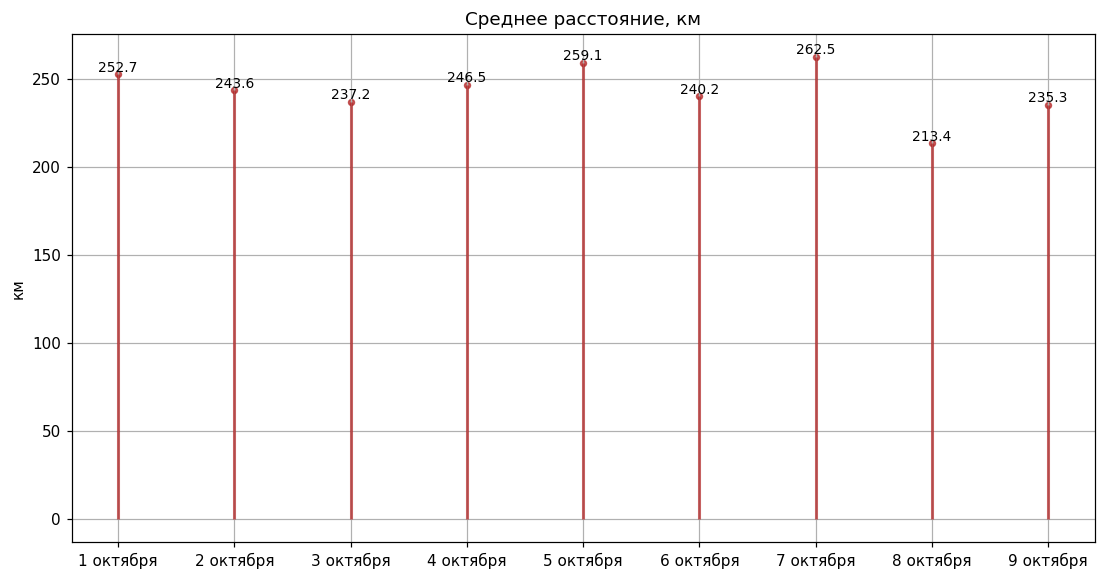

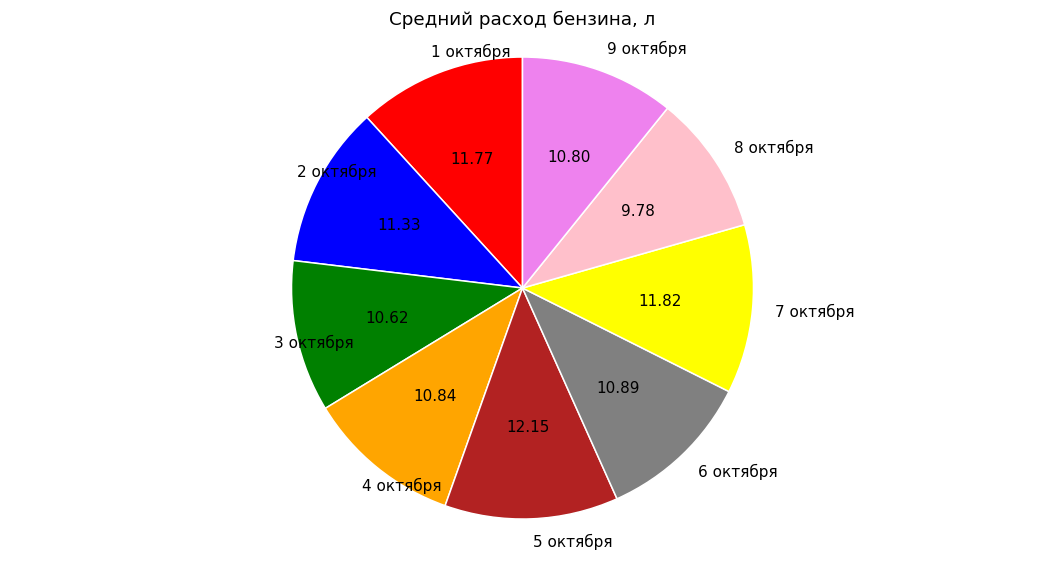

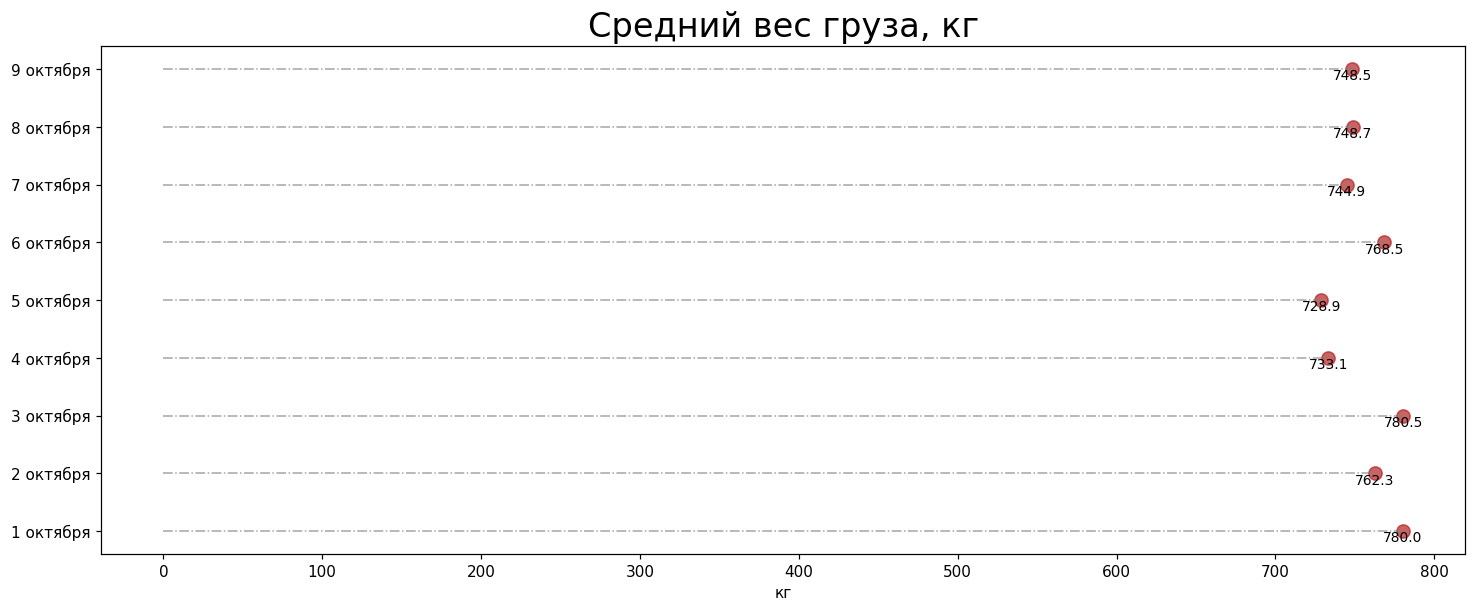

In [139]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv

with open('task19.csv', 'r') as csv_file:
    data = csv.DictReader(csv_file, delimiter=';')
    distance = [0] * 9
    gasoline = [0] * 9
    weight = [0] * 9
    countDays = [0] * 9
    for line in data:
        index = int(line['Дата'][0]) - 1
        distance[index] += int(line['Расстояние'])
        gasoline[index] += int(line['Расход бензина'])
        weight[index] += int(line['Масса груза'])
        countDays[index] += 1

    avgDistane = [0] * 9
    avgGasoline = [0] * 9
    avgWeight = [0] * 9

    for i in range(9):
        avgDistane[i] = distance[i] / countDays[i]
        avgGasoline[i] = gasoline[i] / countDays[i]
        avgWeight[i] = weight[i] / countDays[i]

    dates = []
    for i in range(9):
        dates.append(str(i + 1) + ' октября')

    fig, ax1 = plt.subplots(figsize = (12, 6), dpi = 110)
    ax1.vlines(x = dates, ymin = 0, ymax = avgDistane, color = 'firebrick', alpha = 0.7, linewidth = 2)
    ax1.scatter(x = dates, y = avgDistane, s = 15, color = 'firebrick', alpha = 0.7)
    for i in range(9):
        ax1.text(dates[i], avgDistane[i], s = round(avgDistane[i], 1), horizontalalignment = 'center', verticalalignment = 'bottom', fontsize = 9)
    ax1.grid(True)
    ax1.set_ylabel('км')
    ax1.set_title('Среднее расстояние, км')

    fig, ax2 = plt.subplots(figsize=(12, 6), dpi = 110)
    colors = ['red', 'blue', 'green', 'orange', 'firebrick', 'gray', 'yellow', 'pink', 'violet']
    ax2.pie(avgGasoline, colors = colors, radius = 3, center = (4, 4), labels = dates,
        wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame = False, 
        autopct='%.2f', startangle = 90)
    ax2.axis('equal')
    ax2.set_title('Средний расход бензина, л')

    fig, ax3 = plt.subplots(figsize = (16, 6), dpi = 110)
    ax3.hlines(y = dates, xmin = 0, xmax = avgWeight, color = 'gray', alpha = 0.7, linewidth = 1, linestyles = 'dashdot')
    ax3.scatter(y = dates, x = avgWeight, s=75, color='firebrick', alpha=0.7)
    for i in range(9):
        ax3.text(avgWeight[i], dates[i], s = round(avgWeight[i], 1), horizontalalignment = 'center', verticalalignment = 'top', fontsize = 9)
    ax3.set_title('Средний вес груза, кг', fontdict={'size':22})
    ax3.set_xlabel('кг')
    ax3.set_yticks(dates)
    ax3.set_yticklabels(dates, fontdict={'horizontalalignment': 'right'})